# Introduction to Data Visualization with Seaborn         

## by :   Akshay Tiwari

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset : Billionaires

For the purpose of this report and visualization examples, I have taken the 'Billionaires' Dataset from the CORGIS Datasets. The dataset contains different features of Billionaires from 1996, 2001 and 2014. Majority of the variables are categorical such as category, company name, gender, Region, etc. Two major variables which have been explored throughout the report are Toatal Worth (in Billions) and Age of the particular Billionaire.

In [2]:
data = pd.read_csv('./billionaires.csv')

In [44]:
data.head()

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,True,False,self-made finance,1.0,1996
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,Abigail Johnson,145,North America,relation,investment banking,True,False,inherited,2.5,1996
2,59,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948,True,8.540000e+11,male,...,Abilio dos Santos Diniz,322,Latin America,relation,retail,True,False,inherited,1.2,1996
3,61,New Sectors,Germany,Ratiopharm,new,DEU,1881,True,2.500000e+12,male,...,Adolf Merckle,388,Europe,relation,pharmaceuticals,True,False,inherited,1.0,1996
4,-1,Financial,Hong Kong,Swire,new,HKG,1816,True,1.600000e+11,male,...,Adrian and John Swire,162,East Asia,relation,trading company,True,False,inherited,2.2,1996


In [45]:
data.columns

Index([u'age', u'category', u'citizenship', u'company.name', u'company.type',
       u'country code', u'founded', u'from emerging', u'gdp', u'gender',
       u'industry', u'inherited', u'name', u'rank', u'region', u'relationship',
       u'sector', u'was founder', u'was political', u'wealth.type',
       u'worth in billions', u'year'],
      dtype='object')

In [119]:
data['category'].value_counts()

Financial             800
Non-Traded Sectors    597
Traded Sectors        564
New Sectors           319
Resource Related      245
0                      85
Trucking                1
Finance                 1
energy                  1
Name: category, dtype: int64

### Bar chart

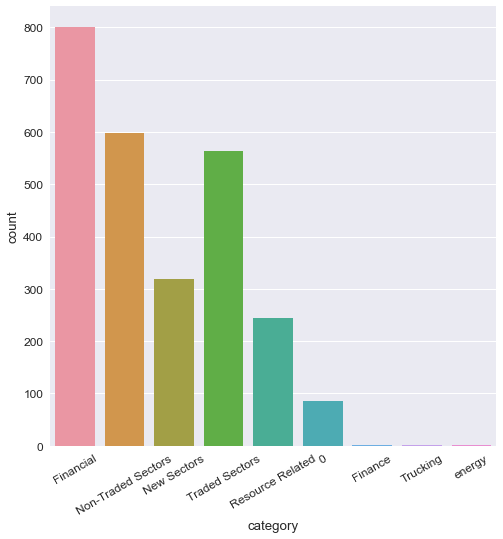

In [108]:
# sns.set_style("whitegrid")
sns.set(font_scale=1.2)
g = sns.factorplot(x="category", data=data, kind='count', size=7)
g.set_xticklabels(rotation=30)
pyplot.show()

- This bar chart shows us the the breakdown of Billionaires according to the defined categories in the datset.
- We can observe that 'Financial' category has the maximum number of Billionaires and the second highest category is unnamed in the dataset

### Histogram or Boxplot

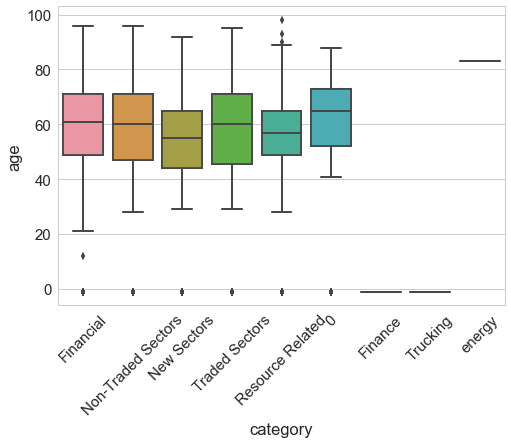

In [100]:
# 1. boxplots 
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
g = sns.boxplot(x="category", y="age",  data=data);

# specify legend placement
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

- This boxplot shows us the range of age range for different category of billionaires.
- It clearly marks the minimum, first quartile, median, third quartile and maximum age.
- We can also observe the outliers for different categories in the boxplot.
- 'New Sectors' has the most broad distribution whereas Finance, Trucking and Energy have either same values or just one observations each

### Scatter plot - bivariate

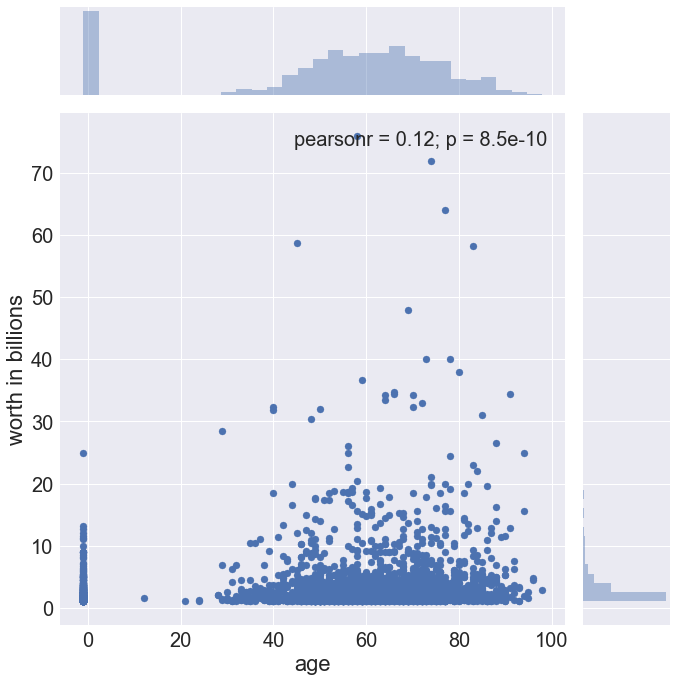

In [57]:
sns.set(font_scale=2)
sns.jointplot(x="age", y="worth in billions", data=data, size=10);

plt.show() 

- We can see a majority of Billionairs between age 40 and 90 which makes sense
- Also, we can see that majority of Billionairs have net worth less than 10 Billions 

- Apart from the central scatter plot, univariate plots can be observed at the respective axes for 'age' and 'worth'

### Scatter plot - trivariate (use color to represent another attribute). Make sure to display a legend

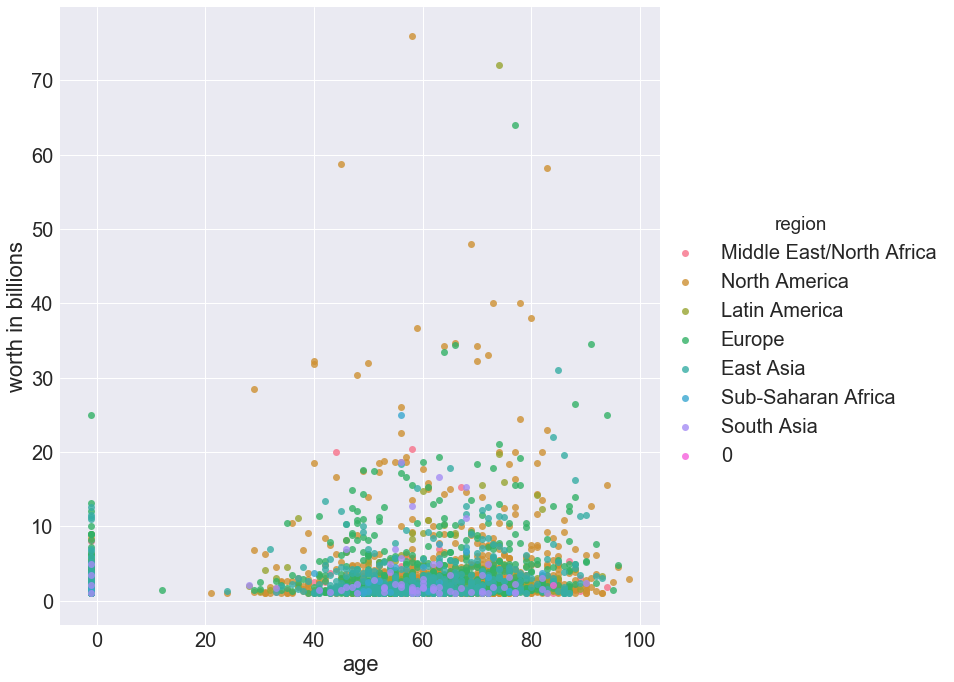

In [58]:
sns.set(font_scale=1.7)
sns.lmplot(x='age', y='worth in billions', hue='region', data=data, fit_reg=False, size=8)

plt.show()

- Same plot as the last one with an additional information about 'Region' of the particular billionaire marked with different colors
- Legend for the color of the 'Region' is represented on the side

### Swarm plot

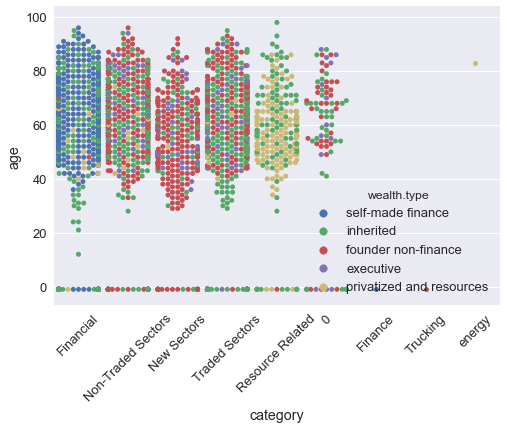

In [121]:
sns.set_style("whitegrid")
sns.set(font_scale=1.3)
sns.swarmplot(x="category", y="age", hue="wealth.type", data=data)
plt.xticks(rotation=45)
plt.show()

- Swarm plot is just a categorical scatter plot with non-overlapping points
- This plot represents the same information as above (i.e. category vs. age) but this time in a different manner, along with an additional information about the wealth type of the Billionaire which is represented in different colors

### Faceted Histogram

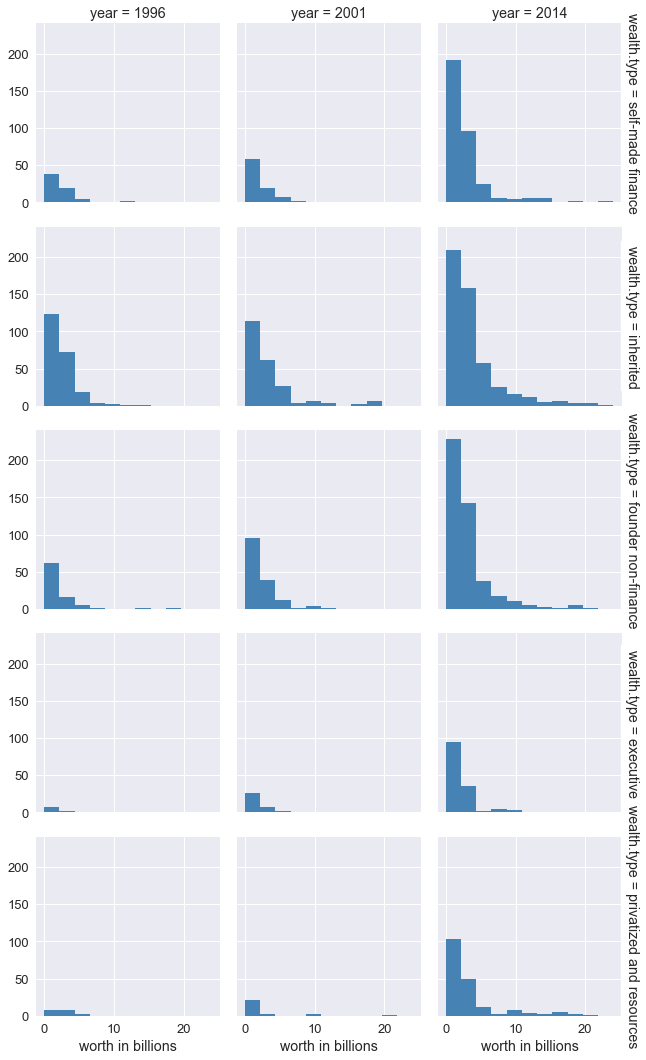

In [64]:
sns.set(font_scale=1.3)
g = sns.FacetGrid(data, row="wealth.type", col="year", margin_titles=True)
bins = np.linspace(0, 24, 12)
g.map(plt.hist, "worth in billions", color="steelblue", bins=bins, lw=0)

plt.show()

- Facet Grid is used to draw a grid of subplots to visualize conditional relationships between the variables
- Particularly in this case, we can see different 'Net Worth' patterns in different years across different Wealth Types
- For example, we can compare self-made wealth in different years. Also, 2014 has the highest number of Billionaires in all categories and for all level of wealths compared to 2001 and 1996 

### Violin Plot

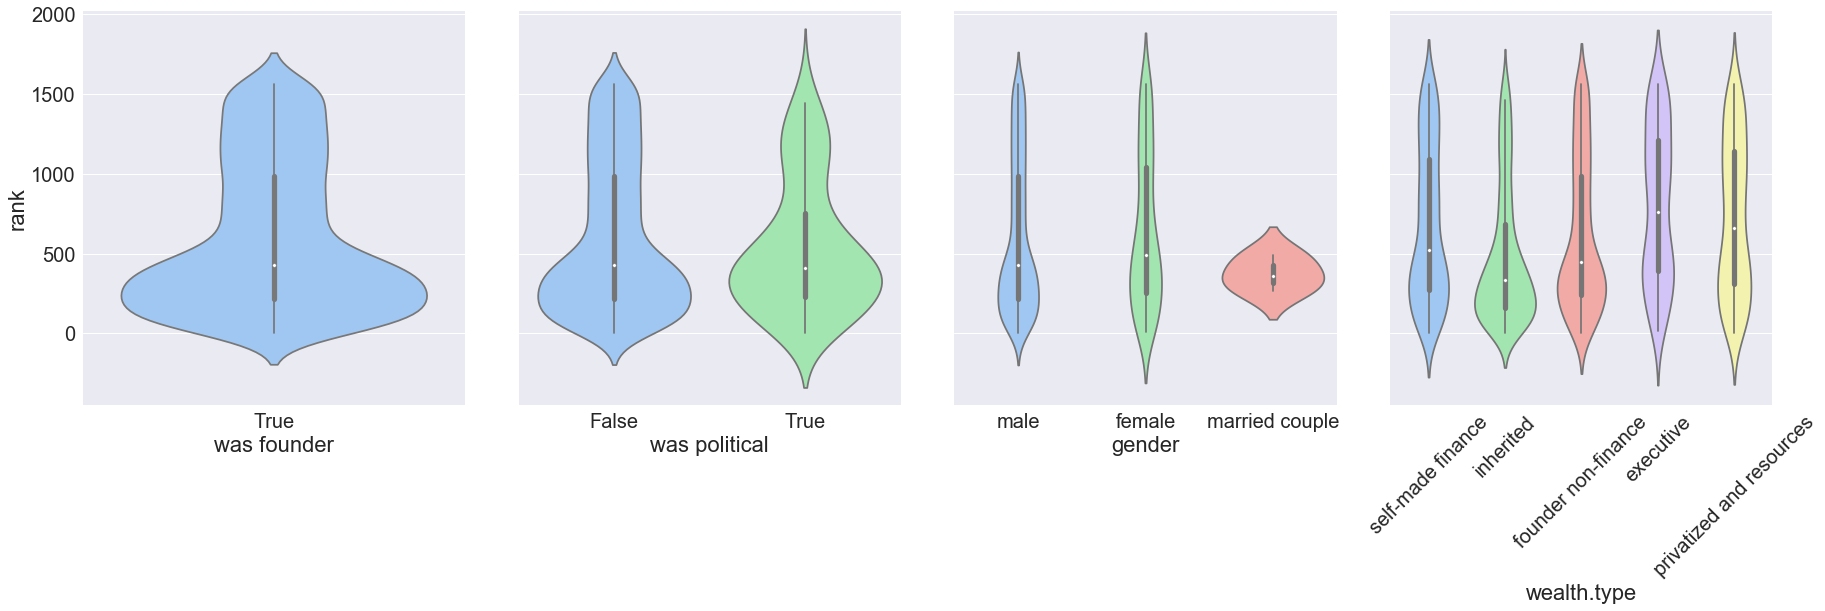

In [124]:
sns.set(font_scale=2)
g = sns.PairGrid(data,
                 x_vars=["was founder", "was political", "gender","wealth.type"],
                 y_vars=["rank"],
                 aspect=.90, size=7)
g.map(sns.violinplot, palette="pastel");
plt.xticks(rotation=45)
plt.show()

- Violin plot is a lot similar to Box plot in terms of metric it represents, but rather than actual data points it corresponds to the distribution of the Data Points across the category.
- Taking this example, we can observe here that for the first plot, density around 250 rank is highest. 
- Also, we can compare the distribution of a variable value across different categories, for example in third case we can see the rank distribution for different Gender of Billionairs

### Bubble chart

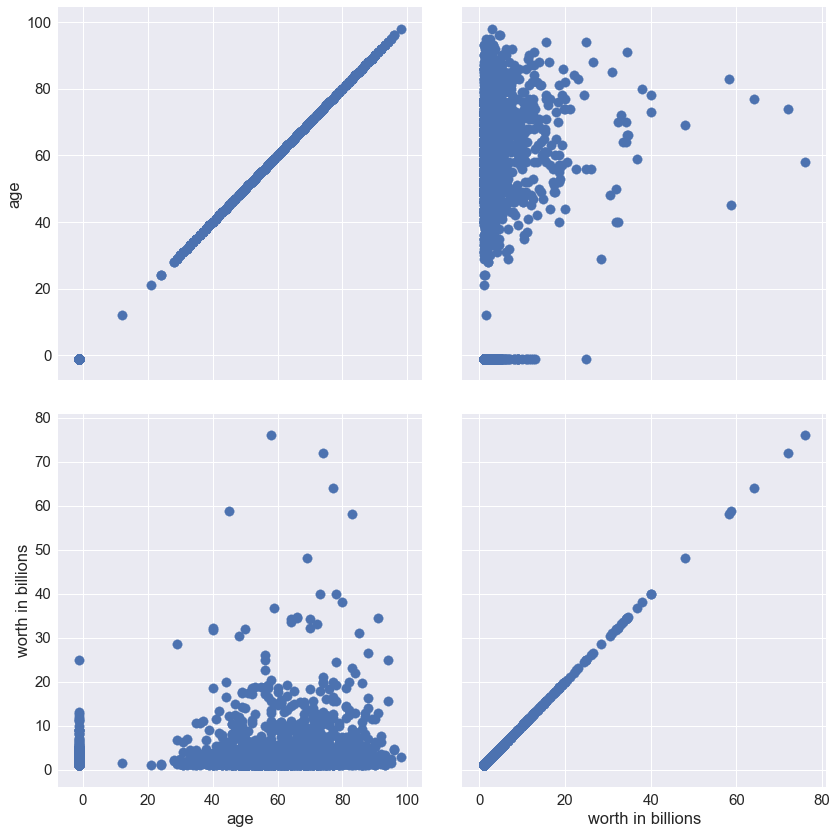

In [68]:
sns.set(font_scale=1.5)
g = sns.PairGrid(data, vars=["age", "worth in billions"], size=6)
g.map(plt.scatter, s=90)

plt.show()

- Bubble chart presented here is basically a scatter plot where data points are represented with bubbles of certain size
- In this grid of Bubble charts we can see a linear relation between 'worth' & 'worth' and 'age' & 'age' which is obvious. And we see a dense distribution around 40 to 90 years of age with worth less than 10 Billions which we saw earlier in the scatter plot. 